# Divide and Conquer

Mit einfachen Sortieralgorithmen, wie beispielweise Selection Sort oder Bubble Sort, ist es möglich Arrays bzw. Listen zu sortieren. Jedoch beträgt die Laufzeit dieser Algorithmen $\mathcal{O}(n^2)$. Es gibt jedoch Algorithmen, die dies wesentlich schneller können und in einer anderen Komplexitätsklasse liegen. Eines dieser Verfahren ist Merge Sort, es nutzt das Divide and Conquer - Prinzip. Ein Divide and Conquer - Algorithmus läuft im Wesentlichen in drei Schritten ab:

1. Teilen - Das Problem wird in gleichartige Subprobleme geteilt, welche sich einfacher lösen lassen.

2. Die Subprobleme werden *rekursiv* gelöst (d.h. solange geteilt, bis sie so klein sind, dass es sich um triviale Probleme handelt, die sich sehr einfach lösen lassen).

3. Zusammenführen (Merge) - Die Ergebnisse der Subprobleme müssen nun zusammengeführt werden, damit dadurch das Ergebnis für das ursprüngliche große Problem entsteht.

## Mergesort

Bei Mergesort findet das Teilen (Divide) durch das Teilen der Liste in zwei gleich große bzw. zwei ungefähr gleich große Teillisten statt. Die Teillisten werden rekursiv solange geteilt, bis ein Elementarfall erreicht ist. Der Elementarfall tritt ein, wenn die Liste entweder leer ist oder nur ein Element enthält. Für diese beiden Fälle ist die Sortierung sehr einfach, die Liste muss lediglich, so wie sie ist, zurückgegeben werden, schließlich können leere oder einelementige Listen nicht unsortiert sein. Der dritte Schritt ist das "Mergen" der *sortierten* Teillisten. Dies findet statt, indem die jeweils ersten Elemente beider Teillisten miteinander verglichen werden und das kleinere Element in die Gesamtliste verschoben wird. Dieser Vorgang wird solange wiederholt, bis wenigstens eine der beiden Teillisten leer ist. Die andere wird in der aktuellen Gesamtliste einfach angefügt.

![Merge Sort](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Merge_sort_algorithm_diagram.svg/300px-Merge_sort_algorithm_diagram.svg.png)

### Komplexitätsbetrachtung

$$T(0) = 0$$
$$T(n) = 2 \cdot T \left(\frac{n}{2} \right) + n$$

__*Beweis.*__

Meistermethode:

$a=2$

$b=2$

$f(n)=n$


$$
\Theta \left(n^{\log_{b}a} \right) = \Theta \left(n^{\log_{2}2} \right) = \Theta(n) \\
f(n) \in \Theta(n) \\
n \in \Theta(n)
$$

Fall 2:

$$
\begin{align}
T(n) & \in \Theta \left(n^{\log_{b}a}\log_{2}n \right) \\ 
 & \in \Theta \left(n^{\log_{2}2}\log_{2}n \right) \\
 & \in \Theta \left(n\log n \right)
\end{align}
$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

Damit liegt der Zeitaufwand für Mergesort in $\mathcal{O}(n\log{n})$ und ist damit wesentlich schneller als einfachere Verfahren wie Selection Sort, Insertion Sort oder Bubble Sort.

Für die folgende Implementation dieses Algorithmus wurde eine funktionsorientierte Beschreibung gewählt. Die zweifache Rekursion ist in der Definition von `mergesort` sehr gut zu erkennen.

In [6]:
import math

def mergesort(lst):
    if len(lst) < 2:
        return lst   
    return merge(mergesort(lst[0:math.floor(len(lst)/2)]), mergesort(lst[math.floor(len(lst)/2):len(lst)]))
       

def merge(a, b):    
    if not a:       
        return b    
    if not b:
        return a    
    if a[0] < b[0]:    
        return [a[0]] + merge(a[1:], b)  
    return [b[0]] + merge(a, b[1:])  
                                     

print(mergesort([5, 1, 8, 2, 7, 3, 4]))

[1, 2, 3, 4, 5, 7, 8]


## Quicksort

Die Idee hinter Quicksort(1960 von C. Antony R. Hoare entwickelt) besteht darin, die Gesamtliste der zu sortierenden Elemente so in genau zwei Teillisten $L$ (linke Teilliste) und $R$ (rechte Teilliste) zu zerlegen, dass alle Elemente von $L$/$R$ kleiner/größer als ein Vergleichselement sind. Dieses Vergleichselement wird der Usprungsliste entnommen und Pivotelement genannt. Dabei spielt es keine Rolle, welches Listenelement als Pivotelement verwendet wird. Eine Möglichkeit ist es, immer das erste oder letzte Element der Liste zu nehmen. Eine weitere gängige Methode ist es, das Pivotlement (pseudo)-zufällig zu wählen, welche Auswirkungen dies auf die average- und worst-case Zeitklomplexität hat, wird im Kapital der randomisierten Algorithmen betrachtet. Die beiden Teillisten rechts und links neben dem Pivotelement müssen solange in Teillisten zerlegt werden, bis die Basisfälle erreicht sind. Die Basisfälle sind die gleichen wie bei Mergesort: Ist die Liste leer oder enthält nur ein Element, so ist praktisch nichts zu tun und die Liste kann einfach so zurückgegeben werden. Das Zusammenführen, also der dritte Schritt eines Divide and Conquer Algorithmus, ist bei Quicksort trivial, da die Teilarrays in ihrer vorhandenen Reihenfolge lediglich konkateniert werden müssen.

<img src="https://antjanusblog-antjanus.netdna-ssl.com/wp-content/uploads/2014/02/color-quicksort.jpg" alt="Drawing" style="width: 400px;"/>

### Komplexitätsbetrachtung

#### Best-case

Der best-case tritt ein, wenn das Pivotelement die Listen immer in zwei gleich große Teillisten teilt.

$$
\begin{align}
T(0) & = 0 \\
T(n) & = 2 \cdot T \left(\frac{n}{2} \right) + n
\end{align}$$

Dies kann äquivalent zu Mergesort mit der Meistermethode gelöst werden und man erhält eine Zeitkomplexität von $\mathcal{O}(n\log{n})$ im __best-case__. Dies gilt übrigens auch für den __average-case__.

#### Worst-case

Der worst-case tritt ein, wenn das Pivotelement die Liste immer in eine leere Teilliste und eine Teilliste der Größe $n-1$ teilt. Dies ist beispielsweise der Fall, wenn man immer das erste Element als Pivot wählt und eine bereits sortierte Liste sortiert. (Das ist kein Schreibfehler: Schlechte Effizienz der Quicksort-Sortierung, wenn die zu sortierende Liste bereits sortiert ist.)

$$
\begin{align}
T(0) & = 0 \\
T(n) & = T(0) + T(n-1) + n
\end{align}$$

Dies kann mit Hilfe der Iterationsmethode gelöst werden.

$$
\begin{align}
T(n) & = T(0) + T(n-1) + n \\
 & = T(0) + (T(0) + T(n-2) + n) + n \\
 & = T(n-2) + 2n \\
 & = (T(0) + T(n-3) + n) + 2n \\
 & = T(n-3) + 3n \\
 & \vdots \\
 & = T(n-i) + i \cdot n
\end{align}
$$

$$
\begin{align}
T(n-i) & = T(0) \\
n - i & = 0 \\
i & = n 
\end{align}
$$

<center>$n$ für $i$ einsetzen</center>

$$
\begin{align}
T(n) & = T(n-i) + i \cdot n \\
 & = T(n-n) + n \cdot n \\
 & = T(0) + n^2 \\
 & = n^2 \\
 & \in \mathcal{O}(n^2)
\end{align}
$$
<!--  div style="text-align: right; font-size: 24px;">&#9633;</div  -->

Der Zeitaufwand beträgt also $\mathcal{O}(n^2)$ im __worst-case__.

In [7]:
def quicksort(lst):
    if len(lst) < 2:
        return lst
    wall = 0
    pivot = lst[0]
    for i in range(1, len(lst)):
        if lst[i] < pivot:
            lst[wall+1], lst[i] = lst[i], lst[wall+1]
            wall += 1
    lst[0], lst[wall] = lst[wall], lst[0]
    return quicksort(lst[:wall]) + [lst[wall]] + quicksort(lst[wall+1:])

print(quicksort([5, 1, 8, 2, 7, 3, 4]))     

[1, 2, 3, 4, 5, 7, 8]


## Konvexe Hülle

Die konvexe Hülle einer Menge an Punkten $P$ im $n$-dimensionalen euklidischen Raum ist das konvexe $n$-Polytop, das alle Punkte $P$ enthält und ein minimales Volumen bzw. minimalen Flächeninhalt besitzt. Äquivalent handelt es sich dabei um ein beliebiges $n$-Polytop mit minimaler Außenfläche bzw. minimalem Umfang. In der Ebene, also im 2-dimensionalen euklidischen Raum, handelt es sich dabei um das Polygon, das alle Punkte enthält mit minimalen Umfang.

<img src="img/ConvexHull.png" alt="Drawing" style="width: 350px;"/>

<center>Konvexe Hülle (Convex hull)</center>

Man kann es sich so vorstellen, als würde man ein Gummiband um die Punkte spannen.

Ziel ist es nun einen Algorithmus zu entwickeln, der das Problem, die konvexe Hülle einer beliebigen Menge gegebener Punkte $P$ zu finden, möglichst effizient löst.

### Brute-Force - Ansatz

Man kann sich jede Verbindung zwischen zwei Punkten als ein Segment vorstellen. Die konvexe Hülle besteht dabei aus einer Menge $S$ solcher Segmente. Diese Menge $S$ ist gleichzeitig eine Teilmenge aller möglichen Segmente der $n$-Punkte. Anhand dieser Tatsache kann man die konvexe Hülle finden, indem man alle möglichen Segmente bildet und bei jedem einzelnen Segment prüft, ob es zur konvexe Hülle gehört oder nicht. Alle Segmente, bei denen dieser Test positiv ausfällt, bilden zusammen die konvexe Hülle. Ein Segment gehört genau dann zur konvexe Hülle, wenn alle Punkte $P$ auf genau einer Seite der Geraden liegen, welche durch das Segment geht.

<img src="img/Segment1.png" alt="Drawing" style="width: 350px;"/>

<center>Segment $AB$ gehört zur konvexe Hülle, da alle Punkte auf einer Seite liegen</center>

<img src="img/Segment2.png" alt="Drawing" style="width: 350px;"/>

<center>Segment $AI$ gehört __nicht__ zur konvexe Hülle, da die Punkte auf verschiedenen Seiten liegen</center>

Anzahl der Segmente, die geprüft werden müssen:

$$N=\binom{n}{2}=\sum_{i=1}^{n-1}i=\frac{n (n+1)}{2}=\frac{n^2}{2}+\frac{n}{2} \in \mathcal{O}(n^2)$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

Da für $n-2$ Punkte berechnet werden muss, auf welcher Seite sie im Verhältnis zur Geraden liegen, beträgt der Zeitaufwand pro Vergleich $\mathcal{O}(n)$. Dies ergibt insgesamt eine Laufzeit von $T(n) \in \mathcal{O}(n^2) \cdot \mathcal{O}(n) \implies T(n) \in \mathcal{O}(n^3)$

### Divide and Conquer - Ansatz

Der erste Schritt ist das Teilen. Das Teilen findet statt, indem zunächst alle Punkte $P$ entlang einer Geraden sortiert werden. Hierfür kann die x-Achse genommen werden, was dazu führt, dass die Punkte nach ihrer x-Koordinate sortiert werden. Mit z.B. den in diesem Kapitel genannten Sortierverfahren erfolgt die Sortierung in $\mathcal{O}(n \log n) $. Anschließend, können die Punkte $P$ in zwei gleich große Mengen geteilt werden, wodurch nun zwei Teilprobleme entstehen, welche rekursiv gelöst werden können.

<img src="img/ConvexHullDivide.png" alt="Drawing" style="width: 350px;"/>

Die Basisfälle sind erreicht, wenn die Menge der Punkte nur noch aus zwei Elementen besteht. In diesem Fall ist die konvexe Hülle die Strecke zwischen den zwei Punkten.

Hat man die Teilprobleme gelöst, so ist es notwendig, die beiden Teil-konvexe Hüllen zur konvexe Hülle des Gesamtproblems zusammenzuführen (Merge). Der naive Ansatz wäre es, alle Segmente zwischen einem Punkt aus der linken Hälfte und einem Punkt aus der rechten Hälfte durchzugehen, und das höchste und tiefste Segment, als das Segment, welche die beiden Teil-konvexen Hüllen verbindet, zu wählen. 

<img src="img/ConvexHullMerge1.png" alt="Drawing" style="width: 350px;"/>

Da es aber auf beiden Seiten jeweils $\frac{n}{2}$ Punkte gibt, müssten $\frac{n^2}{4}$, also $\mathcal{O}(n^2)$ Segmente überprüft werden. Damit ist die Merge-Operation so aufwendig, das kein Gewinn in der Komplexitätsklasse gegenüber dem ursprünglichen Brute-Froce-Ansatz entsteht. Ein anderes Verfahren für die Merge-Operation ist also nötig. Hierfür werden zunächst jeweils ein Punkt aus beiden Mengen genommen, beispielsweise $a_1$ und $b_1$. Der Schnittpunkt mit der Geraden in der Mitte wird ermittelt. Nun ist es Ziel ein Segment zu finden, welches einen höher liegenden Schnittpunkt hat (größerer y-Wert), da das höchste und tiefste Segment gesucht wird. Dieser Vorgang geschieht, indem zunächst auf der rechten Seite der im Uhrzeigersinn nächste Punkt gewählt wird. Der Schnittpunkt mit der Geraden des neuen Segments wird verglichen, ist er nicht höher als der bisherige Wert, so braucht man nicht weiter im Uhrzeigersinn zu gehen und hat den Punkt der rechten Hälfte, welcher zum oberen Segment gehört, bereits gefunden. Ist er hingegen höher, so muss auf der linken Seite gegen den Uhrzeigersinn gegangen werden, und das daraus entstandene Segment verglichen werden. Dieser Vorgang des abwechselnd auf der linken Seite gegen den Uhrzeigersinn und auf der rechten Seite im Uhrzeigersinn zu gehen, wird solange weitergeführt, bis auf der jeweiligen Seite kein höher liegender Schnittpunkt mit der Geraden erreicht wird. Um das untere Segment zu finden, muss entsprechend das Segment mit dem niedrigsten Schnittpunkt gefunden werden und entsprechend auf der linken Seite im Uhrzeigersinn und auf der rechten Seite entgegen des Uhrzeigersinns gegangen werden.

<img src="img/ConvexHullMerge2.png" alt="Drawing" style="width: 450px;"/>

Hieraus ergibt sich, dass das Segment $(a_3, b_2)$ das Gesuchte ist.

<img src="img/ConvexHullMerge3.png" alt="Drawing" style="width: 450px;"/>

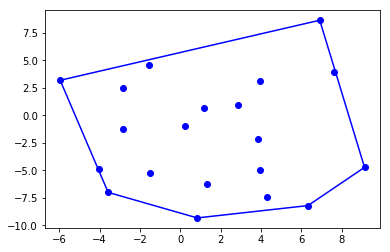

In [8]:
import math
import random
from sympy import Symbol, nsolve
import matplotlib.pyplot as plt


def x_value(point):
    return point[0]


def vector(a, b):
    return (b[0] - a[0], b[1] - a[1])


def clockwise(u, v):
    return u[0] * v[1] - u[1] * v[0] > 0


def index_of_most_left_point(points):
    x = None
    index = 0
    for i in range(0, len(points)):
        if x is None or points[i][0] < x:
            x = points[i][0]
            index = i
    return index


def index_of_most_right_point(points):
    x = None
    index = 0
    for i in range(0, len(points)):
        if x is None or points[i][0] > x:
            x = points[i][0]
            index = i
    return index


def segments_to_points(segments):
    points = []
    for segment in segments:
        points.append(segment[0])
    return points


def mid_x(a, b):
    return (segments_to_points(a)[index_of_most_right_point(segments_to_points(a))][0] +
            segments_to_points(b)[index_of_most_left_point(segments_to_points(b))][0]) / 2


def intercept(line1, line2):
    x = Symbol('x')
    y = Symbol('y')
    a, b = nsolve([line1[0][0] + x * line1[1][0] - (line2[0][0] + y * line2[1][0]),
                   line1[0][1] + x * line1[1][1] - (line2[0][1] + y * line2[1][1])], [x, y], [line1[0][0], line1[1][0]])
    return (line1[0][0] + a * line1[1][0], line1[0][1] + a * line1[1][1])


def convex_hull(points):
    if len(points) == 2:
        return [(points[0], points[1]), (points[1], points[0])]
    if len(points) == 3:
        if clockwise(vector(points[0], points[2]), vector(points[0], points[1])):
            return [(points[0], points[1]), (points[1], points[2]), (points[2], points[0])]
        return [(points[0], points[2]), (points[2], points[1]), (points[1], points[0])]
    sorted_points = sorted(points, key=x_value)
    mid = int(math.floor(len(sorted_points) / 2))
    return merge(convex_hull(sorted_points[:mid]), convex_hull(sorted_points[mid:]))


def merge(a, b):
    index_a_top = index_of_most_right_point(segments_to_points(a))
    index_b_top = index_of_most_left_point(segments_to_points(b))
    mid_line = ((mid_x(a, b), 0), (0, 1))
    temp_intercept = intercept(mid_line, (a[index_a_top][0], vector(a[index_a_top][0], b[index_b_top][0])))[1]

    while True:
        improvement = False
        if intercept(mid_line, (a[index_a_top][0],
                                vector(a[index_a_top][0], b[(index_b_top + 1) % len(b)][0])))[1] > temp_intercept:
            temp_intercept = intercept(mid_line, (a[index_a_top][0],
                                                  vector(a[index_a_top][0], b[(index_b_top + 1) % len(b)][0])))[1]
            index_b_top += 1
            improvement = True
        if intercept(mid_line, (a[(index_a_top - 1) % len(a)][0],
                                vector(a[(index_a_top - 1) % len(a)][0], b[index_b_top][0])))[1] > temp_intercept:
            temp_intercept = intercept(mid_line, (a[(index_a_top - 1) % len(a)][0],
                                                  vector(a[(index_a_top - 1) % len(a)][0], b[index_b_top][0])))[1]
            index_a_top -= 1
            improvement = True
        if not improvement:
            break
        index_a_top %= len(a)
        index_b_top %= len(b)

    index_a_bottom = index_of_most_right_point(segments_to_points(a))
    index_b_bottom = index_of_most_left_point(segments_to_points(b))
    temp_intercept = intercept(mid_line, (a[index_a_bottom][0], vector(a[index_a_bottom][0], b[index_b_bottom][0])))[1]

    while True:
        improvement = False
        if intercept(mid_line, (a[index_a_bottom][0],
                                vector(a[index_a_bottom][0], b[(index_b_bottom - 1) % len(b)][0])))[1] < temp_intercept:
            temp_intercept = intercept(mid_line, (a[index_a_bottom][0],
                                                  vector(a[index_a_bottom][0], b[(index_b_bottom - 1) % len(b)][0])))[1]
            index_b_bottom -= 1
            improvement = True
        if intercept(mid_line, (a[(index_a_bottom + 1) % len(a)][0],
                                vector(a[(index_a_bottom + 1) % len(a)][0], b[index_b_bottom][0])))[1] < temp_intercept:
            temp_intercept = intercept(mid_line, (a[(index_a_bottom + 1) % len(a)][0],
                                                  vector(a[(index_a_bottom + 1) % len(a)][0], b[index_b_bottom][0])))[1]
            index_a_bottom += 1
            improvement = True
        if not improvement:
            break
        index_a_bottom %= len(a)
        index_b_bottom %= len(b)

    merged = []

    i = index_a_bottom
    while i != index_a_top:
        merged.append(a[i])
        i += 1
        i = i % len(a)
    merged.append((a[index_a_top][0], b[index_b_top][0]))
    i = index_b_top
    while i != index_b_bottom:
        merged.append(b[i])
        i += 1
        i = i % len(b)
    merged.append((b[index_b_bottom][0], a[index_a_bottom][0]))
    return merged


points = []

for i in range(0, 20):
    points.append((random.uniform(-10, 10), random.uniform(-10, 10)))

convex_hull = convex_hull(points)

fig = plt.subplot()

x_list = []
y_list = []

for point in points:
    x_list.append(point[0])
    y_list.append(point[1])

fig.plot(x_list, y_list, 'ro', color='blue')

x_list_segments = []
y_list_segments = []

for segment in convex_hull:
    x_list_segments.append(segment[0][0])
    y_list_segments.append(segment[0][1])
x_list_segments.append(convex_hull[0][0][0])
y_list_segments.append(convex_hull[0][0][1])

fig.plot(x_list_segments, y_list_segments, 'r', color='blue')
plt.show()